# Data Cleaning


## 1. Check for missing values


In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv("./mystudents.csv")
df

,Student ID,Name,Age,Score,Grade,Province
0,5010110405,Jane,31,53.75,D,Songkla
1,5110110580,Joe,32,37.65,E,Bangkok
2,6310110042,Dan,19,ขาดสอบ,NaN,Chiangmai
3,6310110073,Tida,18,65,C+,Bangkok
4,6310110076,Jane,21,62,C,Yala
5,6310110092,Smile,20,60.5,C,Chiangrai
6,6310110107,Cole,18,NaN,NaN,Phuket
7,6310110109,Tommy,19,51.75,D,Bangkok
8,6310110145,Jerry,19,64.75,C,Nan
9,6310110147,Anna,18,28.25,E,Krabi


In [3]:
df.notnull()

,Student ID,Name,Age,Score,Grade,Province
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,False,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,False,False,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


In [4]:
df.Score.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: Score, dtype: bool

In [5]:
df.Score.isnull().sum()

1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student ID  20 non-null     int64 
 1   Name        20 non-null     object
 2   Age         20 non-null     int64 
 3   Score       19 non-null     object
 4   Grade       18 non-null     object
 5   Province    20 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


## 2. Fill missing values


In [7]:
student_dict = {
    "name": ["Joe", "Sam", "Harry"],
    "age": [20, 21, 19],
    "marks": [85.10, np.nan, 91.54],
}
df = pd.DataFrame(student_dict)
df

,name,age,marks
0,Joe,20,85.10
1,Sam,21,NaN
2,Harry,19,91.54


In [8]:
print("Replace NaN with 0")
df1 = df.fillna(0)
df1

Replace NaN with 0


,name,age,marks
0,Joe,20,85.10
1,Sam,21,0.00
2,Harry,19,91.54


In [9]:
df.fillna(0, inplace=True)
df

,name,age,marks
0,Joe,20,85.10
1,Sam,21,0.00
2,Harry,19,91.54


In [10]:
student_dict = {
    "name": ["Joe", "Sam", "Harry"],
    "age": [20, 21, 19],
    "marks": [85.10, np.nan, 91.54],
}
df = pd.DataFrame(student_dict)
df

,name,age,marks
0,Joe,20,85.10
1,Sam,21,NaN
2,Harry,19,91.54


In [11]:
df.mean(numeric_only=True)

age      20.00
marks    88.32
dtype: float64

In [12]:
change_dict = {"name": "John Doe", "marks": -100, "total mark": 0}
df1 = df.fillna(value=change_dict)
df1

,name,age,marks
0,Joe,20,85.10
1,Sam,21,-100.00
2,Harry,19,91.54


In [13]:
df1 = df.reindex([0, 1, 2, 3])
df1

,name,age,marks
0,Joe,20.0,85.10
1,Sam,21.0,NaN
2,Harry,19.0,91.54
3,NaN,NaN,NaN


In [14]:
change_dict = {"name": "John Doe", "marks": -100, "total mark": 0}
df1 = df1.fillna(value=change_dict)
df1

,name,age,marks
0,Joe,20.0,85.10
1,Sam,21.0,-100.00
2,Harry,19.0,91.54
3,John Doe,NaN,-100.00


## 3. Example


In [15]:
student_dict = {
    "Name": ["Joe", "Nat", "Harry", "Jack", "Jose", "Jill", "Rose"],
    "Age": [20, 21, 19, 17, 18, 19, 17],
    "Marks": [85.10, 77.80, 91.54, 72, 87.9, 90, 72],
}

# Create DataFrame from dict
df = pd.DataFrame(student_dict, index=["R1", "R2", "R3", "R4", "R5", "R6", "R7"])
df

,Name,Age,Marks
R1,Joe,20,85.10
R2,Nat,21,77.80
R3,Harry,19,91.54
R4,Jack,17,72.00
R5,Jose,18,87.90
R6,Jill,19,90.00
R7,Rose,17,72.00


### 3.1 Write a statement or statments to show the DataFrame df at row R1 and R5 in columns Name and Marks only.


In [16]:
df.loc[["R1", "R5"], ["Name", "Marks"]]

,Name,Marks
R1,Joe,85.1
R5,Jose,87.9


### 3.2 Write a statement or statements to show the DataFrame df from rows R1 to R5 in all columns.


In [17]:
df.loc["R1":"R5"]

,Name,Age,Marks
R1,Joe,20,85.10
R2,Nat,21,77.80
R3,Harry,19,91.54
R4,Jack,17,72.00
R5,Jose,18,87.90


## 4. Replace missing or generic values


In [18]:
temp_dict = {"one": [1, 2, 3, 4, 5, 2000], "two": [1000, np.nan, 3, 4, 5, 6]}
df = pd.DataFrame(temp_dict)
df

,one,two
0,1,1000.0
1,2,NaN
2,3,3.0
3,4,4.0
4,5,5.0
5,2000,6.0


In [19]:
df = pd.DataFrame(temp_dict)
df.replace({1000: -10})

,one,two
0,1,-10.0
1,2,NaN
2,3,3.0
3,4,4.0
4,5,5.0
5,2000,6.0


In [20]:
df.replace({1000: -10, 2000: -20})

,one,two
0,1,-10.0
1,2,NaN
2,3,3.0
3,4,4.0
4,5,5.0
5,-20,6.0


In [21]:
temp_dict = {"one": [1, 2, 3, 4, 5, 2000], "two": [1000, np.nan, 3, 4, 5, 6]}
df = pd.DataFrame(temp_dict)
df

,one,two
0,1,1000.0
1,2,NaN
2,3,3.0
3,4,4.0
4,5,5.0
5,2000,6.0


In [22]:
df.one.mean()

335.8333333333333

In [23]:
df.replace({1000: df.one.mean()}, inplace=True)

In [24]:
df

,one,two
0,1,335.833333
1,2,NaN
2,3,3.000000
3,4,4.000000
4,5,5.000000
5,2000,6.000000


## 5. Drop missing values


In [25]:
student_dict = {
    "name": ["Joe", "Sam", "Harry"],
    "age": [20, 21, 19],
    "marks": [85.10, np.nan, 91.54],
}

# Create DataFrame from dict
df = pd.DataFrame(student_dict)
df

,name,age,marks
0,Joe,20,85.10
1,Sam,21,NaN
2,Harry,19,91.54


In [26]:
df_drop1 = df.dropna()
df_drop1

,name,age,marks
0,Joe,20,85.10
2,Harry,19,91.54


In [27]:
df_drop2 = df.dropna(axis="columns")
df_drop2

,name,age
0,Joe,20
1,Sam,21
2,Harry,19


## 6. Check duplicates


In [28]:
student_dict = {
    "name": ["Joe", "Nat", "Harry", "Joe", "Nat"],
    "age": [20, 21, 19, 20, 21],
    "marks": [70, 77.80, 91.54, 85.10, 77.80],
}

student_df = pd.DataFrame(student_dict)
print("Before")
student_df

Before


,name,age,marks
0,Joe,20,70.00
1,Nat,21,77.80
2,Harry,19,91.54
3,Joe,20,85.10
4,Nat,21,77.80


In [29]:
print("After")

# Drop duplicate rows but keep first
student_df1 = student_df.drop_duplicates()
student_df1

After


,name,age,marks
0,Joe,20,70.00
1,Nat,21,77.80
2,Harry,19,91.54
3,Joe,20,85.10


In [30]:
print("After")

# Drop duplicate rows but keep last
student_df2 = student_df.drop_duplicates(keep="last")
student_df2

After


,name,age,marks
0,Joe,20,70.00
2,Harry,19,91.54
3,Joe,20,85.10
4,Nat,21,77.80


In [31]:
print("After")

# drop duplicate rows
student_df3 = student_df.drop_duplicates(subset=["age", "marks"])
student_df3

After


,name,age,marks
0,Joe,20,70.00
1,Nat,21,77.80
2,Harry,19,91.54
3,Joe,20,85.10


## 5. Irregulat Data (Outliers)


In [32]:
df = pd.read_csv("mystudents.csv")
df

,Student ID,Name,Age,Score,Grade,Province
0,5010110405,Jane,31,53.75,D,Songkla
1,5110110580,Joe,32,37.65,E,Bangkok
2,6310110042,Dan,19,ขาดสอบ,NaN,Chiangmai
3,6310110073,Tida,18,65,C+,Bangkok
4,6310110076,Jane,21,62,C,Yala
5,6310110092,Smile,20,60.5,C,Chiangrai
6,6310110107,Cole,18,NaN,NaN,Phuket
7,6310110109,Tommy,19,51.75,D,Bangkok
8,6310110145,Jerry,19,64.75,C,Nan
9,6310110147,Anna,18,28.25,E,Krabi


In [33]:
df = df.dropna()
df

,Student ID,Name,Age,Score,Grade,Province
0,5010110405,Jane,31,53.75,D,Songkla
1,5110110580,Joe,32,37.65,E,Bangkok
3,6310110073,Tida,18,65,C+,Bangkok
4,6310110076,Jane,21,62,C,Yala
5,6310110092,Smile,20,60.5,C,Chiangrai
7,6310110109,Tommy,19,51.75,D,Bangkok
8,6310110145,Jerry,19,64.75,C,Nan
9,6310110147,Anna,18,28.25,E,Krabi
10,6310110150,Scott,-15,24.5,E,Ang Thong
11,6310110243,Utz,20,56.25,D+,Kalasin


In [34]:
df[df["Age"] < 0]

,Student ID,Name,Age,Score,Grade,Province
10,6310110150,Scott,-15,24.5,E,Ang Thong


In [35]:
df = df[df["Age"] > 0]
df

,Student ID,Name,Age,Score,Grade,Province
0,5010110405,Jane,31,53.75,D,Songkla
1,5110110580,Joe,32,37.65,E,Bangkok
3,6310110073,Tida,18,65,C+,Bangkok
4,6310110076,Jane,21,62,C,Yala
5,6310110092,Smile,20,60.5,C,Chiangrai
7,6310110109,Tommy,19,51.75,D,Bangkok
8,6310110145,Jerry,19,64.75,C,Nan
9,6310110147,Anna,18,28.25,E,Krabi
11,6310110243,Utz,20,56.25,D+,Kalasin
12,6310110250,Rome,19,17.25,E,Kanchanaburi


array([[<Axes: title={'center': 'Student ID'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

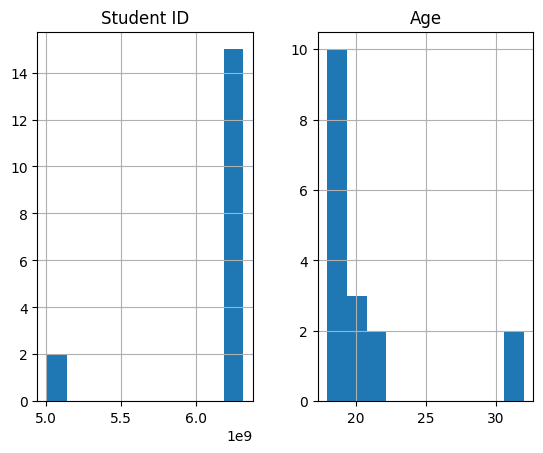

In [36]:
df.hist()

<Axes: >

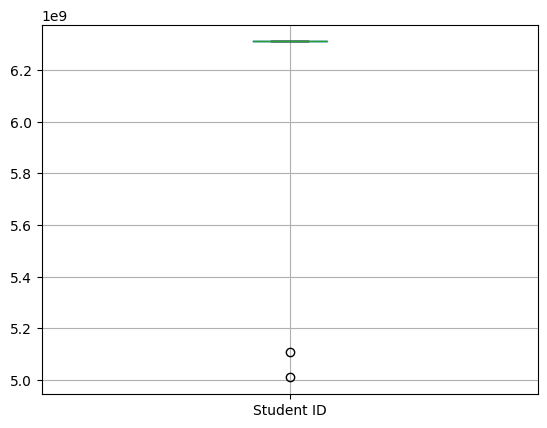

In [37]:
df.boxplot(column=["Student ID"])

## 6. Data Integration

### 6.1 Merge two dataframes


In [38]:
df1 = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/mark.csv",
    header=0,
)
df2 = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv",
    header=0,
)

In [39]:
# Perform data integration to both the dataframe with respect to the column ‘Student_id’ using ‘pd.merge()' function
df = pd.merge(df1, df2, on="Student_id")
df

,Student_id,Mark,City,Age,Gender,Grade,Employed
0,1,95,Chennai,19,Male,1st Class,yes
1,2,70,Delhi,20,Female,2nd Class,no
2,3,98,Mumbai,18,Male,1st Class,no
3,4,75,Pune,21,Female,2nd Class,no
4,5,89,Kochi,19,Male,1st Class,no
...,...,...,...,...,...,...,...
227,228,99,Pune,21,Female,1st Class,no
228,229,70,Chennai,20,Male,2nd Class,no
229,230,55,Delhi,20,Male,3rd Class,yes
230,231,97,Mumbai,19,Female,1st Class,yes


### 6.2 Join two dataframes


In [40]:
# Create dataframe from dict
print("student_df")
student_dict = {"Name": ["Joe", "Nat"], "Age": [20, 21]}
student_df = pd.DataFrame(student_dict)
print(student_df)

print("\nmarks_df")
# Create dataframe from dict
marks_dict = {"Mark": [85.10, 77.80]}
marks_df = pd.DataFrame(marks_dict)
print(marks_df)

print("\njoined_df")
# Join dfs
joined_df = student_df.join(marks_df)
print(joined_df)

student_df
  Name  Age
0  Joe   20
1  Nat   21

marks_df
   Mark
0  85.1
1  77.8

joined_df
  Name  Age  Mark
0  Joe   20  85.1
1  Nat   21  77.8


### 6.3 Concatenation


In [41]:
student_dict1 = {
    "Name": ["Joe", "Nat"],
    "Age": [
        20,
        21,
    ],
    "Mark": [
        85.10,
        77.80,
    ],
}
student_dict2 = {"Name": ["Harry", "Ethan"], "Age": [19, 21], "Mark": [91.54, 71.80]}
print("student_df1")

# Create DataFrame from dict
student_df1 = pd.DataFrame(student_dict1)
print(student_df1)

print("\nstudent_df2")
# Create DataFrame from dict
student_df2 = pd.DataFrame(student_dict2)
print(student_df2)

print("\ncombined")
combined_df = pd.concat([student_df1, student_df2], axis=0)
# (axis = 0 for row, axis = 1 for columns)
print(combined_df)

student_df1
  Name  Age  Mark
0  Joe   20  85.1
1  Nat   21  77.8

student_df2
    Name  Age   Mark
0  Harry   19  91.54
1  Ethan   21  71.80

combined
    Name  Age   Mark
0    Joe   20  85.10
1    Nat   21  77.80
0  Harry   19  91.54
1  Ethan   21  71.80


### 6.4 Aggregate or group dataframes based on condition


In [42]:
# Create DataFrame from dict
student_dict = {
    "Name": ["Joe", "Nat", "Harry"],
    "Class": ["A", "B", "A"],
    "Mark": [85.10, 77.80, 91.54],
}
student_df = pd.DataFrame(student_dict)
print(student_df)

print("\nGroup by mean")
# apply group by
student_df = student_df.groupby("Class").mean(numeric_only=True)
print(student_df)

    Name Class   Mark
0    Joe     A  85.10
1    Nat     B  77.80
2  Harry     A  91.54

Group by mean
        Mark
Class       
A      88.32
B      77.80


In [43]:
# Create DataFrame from dict
student_dict = {
    "Name": ["Joe", "Nat", "Harry"],
    "Class": ["A", "B", "A"],
    "Mark": [85.10, 77.80, 91.54],
}
student_df = pd.DataFrame(student_dict)
print(student_df)

print("\nAggregate")
student_stat = student_df["Mark"]
print(student_stat)
student_stat = student_stat.agg(["sum", "max", "mean"])
print(student_stat)

    Name Class   Mark
0    Joe     A  85.10
1    Nat     B  77.80
2  Harry     A  91.54

Aggregate
0    85.10
1    77.80
2    91.54
Name: Mark, dtype: float64
sum     254.440000
max      91.540000
mean     84.813333
Name: Mark, dtype: float64


## 7. Data Transformation

### 7.1 Transpose


In [44]:
# Create DataFrame from dict
student_dict = {
    "Name": ["Joe", "Nat", "Harry"],
    "Class": ["A", "B", "A"],
    "Mark": [85.10, 77.80, 91.54],
}
student_df = pd.DataFrame(student_dict)
print(student_df)

print("\nTranspose View")
print(student_df.T)

    Name Class   Mark
0    Joe     A  85.10
1    Nat     B  77.80
2  Harry     A  91.54

Transpose View
          0     1      2
Name    Joe   Nat  Harry
Class     A     B      A
Mark   85.1  77.8  91.54


### 7.2 Replace categorical values


In [45]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv"
)
df.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [46]:
# Use select_dtypes() function from pandas dataframe to find the categorical column and separate out with different dataframe df_categorical
df_categorical = df.select_dtypes(exclude=np.number)
df_categorical.head()

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no


In [47]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Student_id,Age
0,1,19
1,2,20
2,3,18
3,4,21
4,5,19


In [48]:
# Find unique values in the column
df_categorical["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [49]:
df_categorical = df_categorical.replace({"Male": 1, "Female": 2})
df_categorical

,Gender,Grade,Employed
0,1,1st Class,yes
1,2,2nd Class,no
2,1,1st Class,no
3,2,2nd Class,no
4,1,1st Class,no
...,...,...,...
227,2,1st Class,no
228,1,2nd Class,no
229,1,3rd Class,yes
230,2,1st Class,yes


### 7.3 Label encoder


In [50]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Creating the object instance
label_encoder = LabelEncoder()

In [51]:
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,1,1st Class,yes
1,2,20,0,2nd Class,no
2,3,18,1,1st Class,no
3,4,21,0,2nd Class,no
4,5,19,1,1st Class,no


### 7.4 One-hot encoder


In [52]:
df_onehot = pd.get_dummies(df, columns=["Grade"])
df_onehot.head()

,Student_id,Age,Gender,Employed,Grade_1st Class,Grade_2nd Class,Grade_3rd Class
0,1,19,1,yes,True,False,False
1,2,20,0,no,False,True,False
2,3,18,1,no,True,False,False
3,4,21,0,no,False,True,False
4,5,19,1,no,True,False,False


In [53]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Creating the object instance
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
temp_ndarray = onehot_encoder.fit_transform(df[["Grade"]])
temp_ndarray

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [54]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv"
)

# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Creating the object instance
onehot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
temp_ndarray = onehot_encoder.fit_transform(df[["Grade"]])
temp_df = pd.DataFrame(
    temp_ndarray, columns=["Grade_1st Class", "Grade_2nd Class", "Grade_3rd Class"]
)
print(temp_df)

     Grade_1st Class  Grade_2nd Class  Grade_3rd Class
0                1.0              0.0              0.0
1                0.0              1.0              0.0
2                1.0              0.0              0.0
3                0.0              1.0              0.0
4                1.0              0.0              0.0
..               ...              ...              ...
227              1.0              0.0              0.0
228              0.0              1.0              0.0
229              0.0              0.0              1.0
230              1.0              0.0              0.0
231              0.0              0.0              1.0

[232 rows x 3 columns]


In [55]:
# Merge with the main df
df_onehot = df.join(temp_df)
df_onehot.head(10)

,Student_id,Age,Gender,Grade,Employed,Grade_1st Class,Grade_2nd Class,Grade_3rd Class
0,1,19,Male,1st Class,yes,1.0,0.0,0.0
1,2,20,Female,2nd Class,no,0.0,1.0,0.0
2,3,18,Male,1st Class,no,1.0,0.0,0.0
3,4,21,Female,2nd Class,no,0.0,1.0,0.0
4,5,19,Male,1st Class,no,1.0,0.0,0.0
5,6,20,Male,2nd Class,yes,0.0,1.0,0.0
6,7,19,Female,3rd Class,yes,0.0,0.0,1.0
7,8,21,Male,3rd Class,yes,0.0,0.0,1.0
8,9,22,Female,3rd Class,yes,0.0,0.0,1.0
9,10,21,Male,1st Class,no,1.0,0.0,0.0


### 7.5 Scaling


In [56]:
# Create DataFrame from dict
student_dict = {
    "Name": ["Joe", "Nat", "Harry"],
    "Class": ["A", "B", "A"],
    "Marks": [65.10, 55.80, 71.54],
}
student_df = pd.DataFrame(student_dict)
print(student_df)

    Name Class  Marks
0    Joe     A  65.10
1    Nat     B  55.80
2  Harry     A  71.54


In [57]:
student_df = pd.DataFrame(student_dict)
student_df["Marks"] = student_df["Marks"] + 10
print(student_df)

    Name Class  Marks
0    Joe     A  75.10
1    Nat     B  65.80
2  Harry     A  81.54


### 7.6 Min-max scaling


In [58]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Wholesale%20customers%20data.csv"
)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [59]:
null_df = df.isna().any()
print(null_df)

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool


In [60]:
from sklearn.preprocessing import MinMaxScaler

# Creating the object instance
min_max_scaler = MinMaxScaler()

# norm_scale = MinMaxScaler().fit_transform(df)
norm_scale = min_max_scaler.fit_transform(df)
scaled_frame = pd.DataFrame(norm_scale, columns=df.columns)
scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


### 7.7 Discreatization


In [61]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Student_bucketing.csv",
    header=0,
)
df.head(10)

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57
5,6,20,2nd Class,yes,53
6,7,19,3rd Class,yes,78
7,8,21,3rd Class,yes,70
8,9,22,3rd Class,yes,97
9,10,21,1st Class,no,58


In [62]:
df["mark_class"] = pd.cut(
    df["marks"],
    5,
    labels=["Poor", "Below_average", "Average", "Above_Average", "Excellent"],
)
df.head(10)

,Student_id,Age,Grade,Employed,marks,mark_class
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average
5,6,20,2nd Class,yes,53,Average
6,7,19,3rd Class,yes,78,Above_Average
7,8,21,3rd Class,yes,70,Above_Average
8,9,22,3rd Class,yes,97,Excellent
9,10,21,1st Class,no,58,Average
